<a href="https://colab.research.google.com/github/bijitdeb/Course/blob/master/MNIST_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
%matplotlib inline

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Loading data

In [19]:
!unzip "/content/gdrive/My Drive/MNIST/MNIST_data.zip"
!ls

Archive:  /content/gdrive/My Drive/MNIST/MNIST_data.zip
  inflating: test.csv                
  inflating: train.csv               
gdrive	sample_data  test.csv  train.csv


In [20]:
data = pd.read_csv('train.csv')
X_test = pd.read_csv("test.csv")

In [21]:
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Extracting feature variables and target variable

In [22]:
data_y = data['label'].values
data_x = data.drop('label',axis=1)

In [23]:
data_x.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data visualization

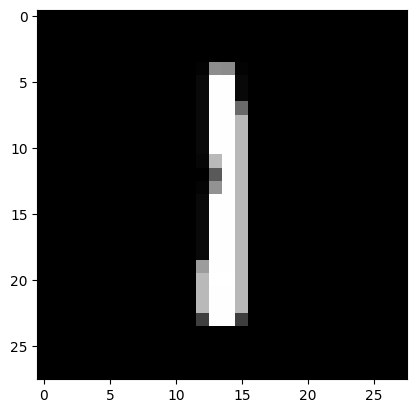

In [24]:
img = data_x.iloc[2].values.reshape((28,28))
plt.imshow(img,cmap='gray')

In [25]:
set(data_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [26]:
X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size = 0.1, random_state=42)

### Model Building

In [27]:
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(784,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)])

In [28]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


### Model training

In [29]:
model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
591/591 [==============================] - 5s 6ms/step - loss: 1.5410 - accuracy: 0.8462 - val_loss: 0.4273 - val_accuracy: 0.9074
Epoch 2/5
591/591 [==============================] - 3s 5ms/step - loss: 0.3004 - accuracy: 0.9256 - val_loss: 0.3294 - val_accuracy: 0.9264
Epoch 3/5
591/591 [==============================] - 3s 6ms/step - loss: 0.2002 - accuracy: 0.9458 - val_loss: 0.2413 - val_accuracy: 0.9398
Epoch 4/5
591/591 [==============================] - 5s 8ms/step - loss: 0.1546 - accuracy: 0.9566 - val_loss: 0.2735 - val_accuracy: 0.9350
Epoch 5/5
591/591 [==============================] - 3s 5ms/step - loss: 0.1443 - accuracy: 0.9592 - val_loss: 0.2451 - val_accuracy: 0.9419


### Model evaluation

In [30]:
model.predict(X_test).argmax(axis=1)

875/875 [==============================] - 2s 2ms/step


array([2, 0, 9, ..., 3, 9, 2])

875/875 [==============================] - 1s 2ms/step
The predicted label is: 0


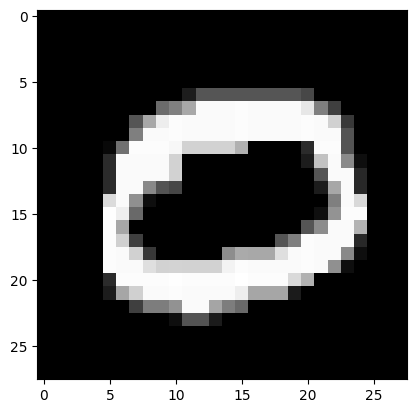

In [31]:
img = X_test.iloc[1].values.reshape((28,28))
plt.imshow(img,cmap='gray')
print("The predicted label is:" ,model.predict(X_test).argmax(axis=1)[1])

Further ahead: You can try increasing the model layers and play with the hyperparameters to increase model's performance